In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.dropna(inplace=True)#dopping missing values

In [5]:
df.shape

(714, 3)

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# Without binarization
dtc=DecisionTreeClassifier()

In [10]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=dtc.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=100,scoring='accuracy'))


0.6192857142857142

In [14]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')#bin creation

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [17]:
trf.named_transformers_['first'].n_bins_ #no. of bins


array([15])

In [18]:
trf.named_transformers_['first'].bin_edges_ #range #10% values between 0.42 & 14 #20% lis beteen 19,22

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [20]:
output.sample(5)

,age,age_trf,fare,fare_trf
202,34.0,9.0,6.4958,0.0
44,19.0,3.0,7.8792,2.0
710,24.0,5.0,49.5042,11.0
789,46.0,12.0,79.2000,13.0
585,18.0,2.0,79.6500,13.0


In [21]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [22]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
197,42.0,12.0,8.4042,4.0,"(38.0, 42.0]","(8.158, 10.5]"
694,60.0,14.0,26.5500,10.0,"(54.0, 80.0]","(26.0, 26.55]"
603,44.0,12.0,8.0500,3.0,"(42.0, 47.0]","(7.896, 8.158]"
823,27.0,6.0,12.4750,5.0,"(25.0, 28.0]","(10.5, 13.0]"
576,34.0,9.0,13.0000,6.0,"(32.0, 35.0]","(10.5, 13.0]"


In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [25]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6316901408450704

In [26]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6246870109546165


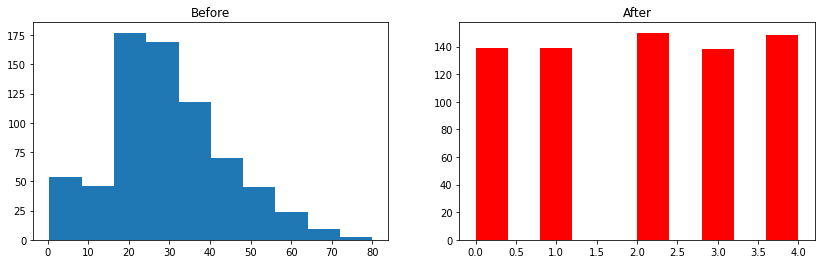

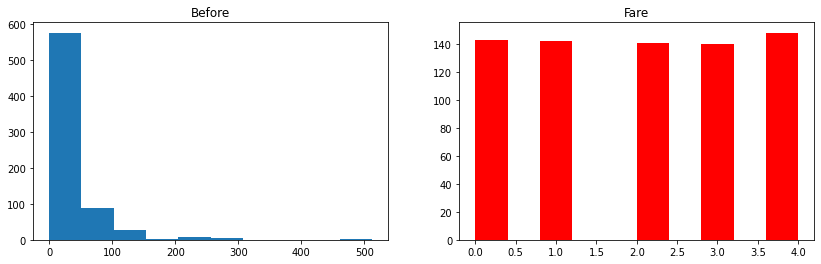

In [27]:
discretize(5,'quantile')

0.6317292644757433


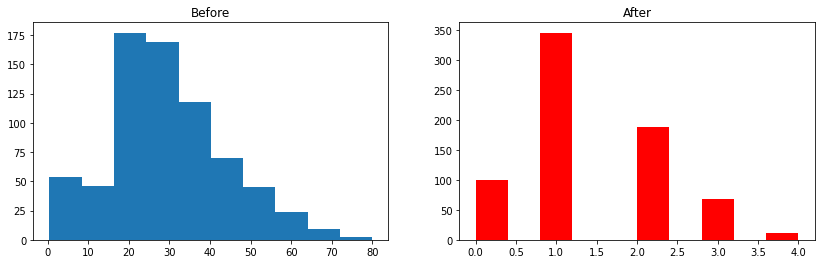

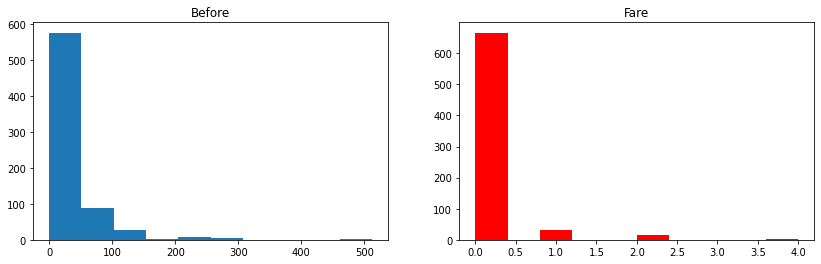

In [28]:
discretize(5,'uniform')

0.6359154929577465


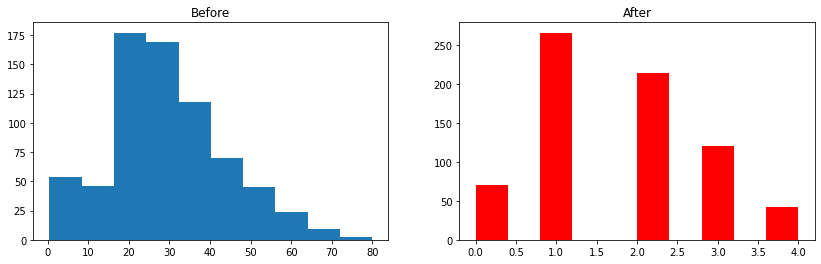

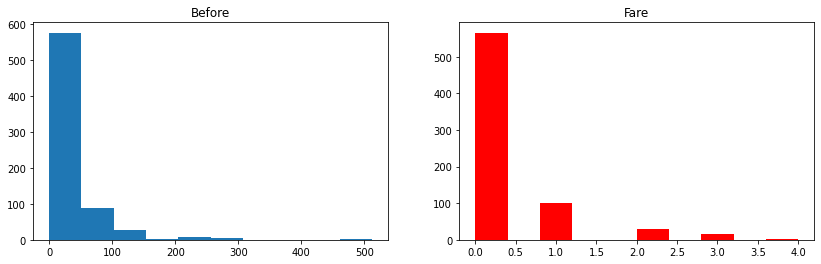

In [29]:
discretize(5,'kmeans')